In [1]:
%matplotlib inline
import os
import numpy as np
import hashlib
from PIL import Image
import matplotlib.pyplot as plt
import pytesseract
import pandas as pd

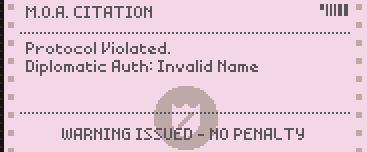

In [2]:
for root, dirs, files in os.walk('data'):
    if 'result.png' in files:
        img = Image.open(os.path.join(root, 'result.png'))
        break
img

In [3]:
h = hash(str(np.array(img)))
h

-3157245243577778900

In [4]:
id_to_image = {}
hash_to_image = {}
for root, dirs, files in os.walk('data'):
    if 'result.png' in files:
        img = Image.open(os.path.join(root, 'result.png'))
        id_to_image[os.path.basename(root)] = img
        h = hashlib.md5(img.tobytes()).hexdigest()
        hash_to_image[h] = img

In [5]:
len(id_to_image), len(hash_to_image)

(1738, 201)

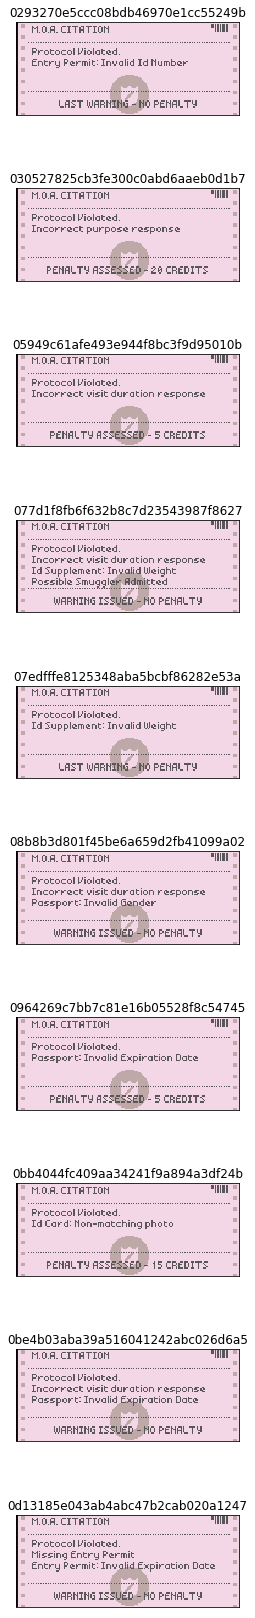

In [6]:
plt.figure(figsize=(4, 30))
display = 10
for i, k in enumerate(sorted(hash_to_image.keys())[:display]):
    plt.subplot(display, 1, i+1), plt.xticks([]), plt.yticks([]), plt.title(k), plt.imshow(hash_to_image[k]);

In [7]:
VIOLATIONS = [
    # entry permit
    'Entry Permit: Invalid Id Number',
    'Entry Permit: Invalid Expiration Date',
    'Entry Permit: Invalid Name',
    'Missing Entry Permit',
    'Forged Entry Permit',

    # passport
    'Missing Passport',
    'Passport: Invalid Gender',
    'Passport: Invalid Expiration Date',
    'Passport: Non-matching photo',
    'Passport: Invalid Issuing City',
    
    # id card
    'Missing Id Card',
    'Id Card: Invalid Birth Date',
    'Id Card: Non-matching photo',
    'Id Card: Invalid Weight',
    'Id Card: Invalid Height',
    'Id Card: Invalid Name',
    'Id Card: Invalid District',

    # id supplement
    'Missing Id Supplement',
    'Id Supplement: Invalid Expiration Date',
    'Id Supplement: Invalid Weight',
    'Id Supplement: Invalid Height',
    'Id Supplement: Invalid Thumbprint',
    'Id Supplement: Invalid Description',

    # responses
    'Incorrect purpose response',
    'Incorrect visit duration response',
    
    # Diplomatic
    'No Diplomatic Access to Arstotzka',
    'Diplomatic Auth: Invalid Name',
    'Diplomatic Auth: Invalid Id Number',
    'Forged Diplomatic Auth',

    # Work pass
    'Missing Work Pass',
    'Work Pass: Invalid Name',
    'Forged Work Pass',
    'Work Pass: Invalid Work End Date',

    # Wanted criminal
    'Wanted criminal admitted',
]

def find_violations(img):
    img = img.crop((20, 38, img.width-20, 112))
    data = ' '.join(pytesseract.image_to_data(img, output_type=pytesseract.Output.DICT)['text'])
    data = data.replace('Protocol Fiolated. ', '')
    data = data.replace('Protocol Hiolated. ', '')
    data = data.strip()
    data = data.replace('Trvalid', 'Invalid')
    data = data.replace('Humber', 'Number')
    data = data.replace('lleight', 'Weight')
    data = data.replace('llork', 'Work')
    data = data.replace('Hon-matching', 'Non-matching')
    data = data.replace('Inwalid eight', 'Invalid Weight')
    data = data.replace('Invalid ileight', 'Invalid Weight')
    data = data.replace('Ho Diplomatic Access', 'No Diplomatic Access')
    data = data.replace('!', ':')
    data = data.replace('Inwalid', 'Invalid')
    data = data.replace('Td Number', 'Id Number')
    data = data.replace('Invalid Lesuing City', 'Invalid Issuing City')
    data = data.replace('Td Supplement', 'Id Supplement')
    data = data.replace('Lgl humbprint', 'Invalid Thumbprint')
    data = data.replace('Invalid Jd Number', 'Invalid Id Number')
    data = data.replace('Invalid Nome', 'Invalid Name')
    data = data.strip()
    violations = [v for v in VIOLATIONS if v in data]
    for v in violations:
        data = data.replace(v, '')
    data = data.strip()
    for suffix in ('a,', ':', '.', ','):
        if data.endswith(suffix):
            data = data[:-len(suffix)].strip()
    data = data.strip()
    data = data.replace('  ', ' ')
    data = data.replace('Possible Smuqgler Admitted', '')
    data = data.replace('Possible Smuggler, Admitted', '')
    if len(data) > 0:
        raise Exception('exceeding text: "{}"'.format(data))
    return violations

[h for h, img in hash_to_image.items() if len(find_violations(img)) == 0]

['6fdb0bbe2925a006d01718f8111245d9', 'fc31124f8e4916df1bbce00a053c2b56']